# Daugiamačiai modeliai ir jų optimizavimas
Tai galingesnis modelines veikia su keliais kintamaisiais. Ankstesniuose pavyzdžiuose susiejome modelį <code>**tarp priklausomo kintamojo (y) ir nepriklausomo kintamųjo (x)**</code>

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [372]:
data = pd.read_csv('../data_samples/real_estate_boston.csv')

In [373]:
data

,RM,Kaina tūks. $
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


<code>**RM**</code> - mūsų x kintamasis kuris reiškia vidutinį kambarių skaičius būste.

Taigi, norėdami numatyti y<code>**(kainą), naudojome vieną savybę, vieną kintamajį x<code>**(RM)**</code>.**</code>
Mūsų hipotezė:
$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1}$$

Bet jei turėtume daugiau nei vieną sabybę ? Pvz. nuosavybės amžius, mokesčių dydis, nusikalstamumas apylinkėje ir kt. 

In [374]:
full_data = pd.read_csv('../data_samples/real_estate_boston_full.csv')

In [375]:
type(full_data)

pandas.core.frame.DataFrame

In [376]:
full_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [377]:
full_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Tai suteikia mums daug daugiau informacijos, leidžiančios prognozuoti tiksliau kainą. Visiems šiems  kintamiesiems naudosime žymėjimą <code>**x1, x2, x3 ir tt**</code>. Išvesties kintamajam (kaina) ir toliau naudosime žymėjimą<code>**y**</code>.

<code>**Notacija**</code>:
 * <code>**n**</code> = savybių skaičius;
 * <code>**m**</code> = duomenų rinkinio stebėjimų skaičius;
 * <code>**x(i)**</code> = įvesties kintamasis <code>**(savybė)**</code> iš i'th duomenų rinkinio pavyzdžio;
 * <code>**x(i)(j)**</code> = savybės j reikšmė iš i'th duomenų rinkinio pavyzdžio.
 
Tarkime, kad x(2) bus mūsų duomenų rinkinio antrojo pavyzdžio funkcijų vektorius:

In [361]:
n = full_data.columns

In [362]:
len(n) - 1

13

In [363]:
full_data.iloc[1,:].values

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00, 2.1600e+01])

\begin{equation*}x^{2} = 
\begin{bmatrix}
0.02731 \\
0.0  \\
7.07 \\
0.0  \\ 
0.0  \\
0.469\\
...
\end{bmatrix}
\in \mathbb{R^{n}}
\end{equation*}

Tai viršutinis indeksas yra tik <code>**duomemų rinkinio pavyzdžio indeksas**</code>. Ir apatinis indeksas yra nuoroda į mokymo pavyzdžio konrečia savybė.

$$ x^{(2)}_3$$

In [364]:
full_data.iloc[1,2]

7.07

<code>**Pastaba:**</code> nepamirškite indeksuotės, matematikoje nuo 1, programavime nuo 0.

<div class="alert alert-block alert-success">
<h2>Klasės pratimas</h2>
    Mūsų duomenų rinkinyje, kas yra:

$$x^{(4)}_6$$
</div>

Dabar turime daug savybių(daug x) kurių reikšmes turi integruoti į modelį. Kokia turėtų būti mūsų hipotezės forma?
Anksčiau su vienu <code>**x**</code> modelis buvo:
$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

Dabar tai bus taip:

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

Specifins pavyzdys atrodytų taip (kiekviena x reikšmė turi greta po koeficientą):

$$h_{\theta}(x) = 80 + 2.2x_{1} + 0.05x_{2} + 3x_{2} + 2.2x_{3} - 5.05x_{4}$$

<code>**Pastaba:**</code> Prisiminkite kad hipotezė (modelis) bando numatyti išvesties reikšmę <code>**y**</code>su nurodytomis įvesties reikšmėmis <code>**x**</code>.

Supraskime šią lygtį:
$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

Kol kas dėl matematinio patogumo apibrėžkite <code>**kad nulinę savybė visada įgauna 1 reikšmę.**</code>
$$ x^{(i)}_0 = 1$$

Dabar mūsų (x'ų) savybių <code>**vektorius 𝑥⃗**</code>  tampa n+1 dimensijų vektorius.

\begin{equation*}
x = 
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2} \\ 
...   \\
x_{n} \\
\end{bmatrix}
\in
\mathbb{R^{n+1}}
\end{equation*}

Ir mūsų koefcientai/parametrai gali būti vektorius:
\begin{equation*}
\theta = 
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\ 
...   \\
\theta_{n} \\
\end{bmatrix}
\in
\mathbb{R^{n+1}}
\end{equation*}

Taigi mūsų hipotezę galima perrašyti kaip:
$$h_{\theta}(x^) = \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n} = \theta^{\top} x^{i}$$

\begin{equation*}
\begin{bmatrix}
\theta_{0} \theta_{1} \theta_{2}  ... \theta_{n}
\end{bmatrix}
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2} \\ 
...   \\
x_{n} \\
\end{bmatrix}
= \theta^\top \ x
\end{equation*}

Tai patogus būdas parašyti hipotezę, nes tai tik sandaugos produktas tarp mūsų parametrų theta vektoriaus ir savybių vektoriaus x.

$$h_{\theta}(x) = \theta^{\top}x  = \hat{y} $$

## Gradientinio nusileidimo taikymas su daugiamačiu modeliu

Kaip optimizuoti tokios hipotezės parametrus? Kitaip sakant kaip naudoti GD tiesinei regresijos modeliui dirbant su keliomis savybėmis ?

### Planas

<code>**Hipoteze**</code>:
\begin{multline*}
h_{\theta}(x) = \theta^\top x =  \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} +  ... +  \theta_{n}x_{n}
\end{multline*}
\begin{multline*}x_{0} = 1 \end{multline*}
<code>**Parametrai, parametrų vektorius**</code>:
\begin{multline*}
\vec{\theta} , n+1 \text{ dimensionl vector}
\end{multline*}

<code>**Kainos funckija**</code>:
\begin{multline*}
J(\vec{\theta}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2
\end{multline*}

<code>**Tikslas**</code>:
\begin{multline*}
\min(\theta_{0}, \theta_{1}, ..., \theta_{n})
\end{multline*}

## Gradientinis nusileidimas

<code>**GD:**</code><br>

`repeat until convergence (for j = 0, ..., n){
`\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\vec{\theta})
\end{multline*}
`}` <br>
<code>**Taikant gradiento nusileidimą nepamirškite, kad tuo pačiu metu turime atnaujinti visus parametrus!**</code>


GD su viena savybę (x) <code>**(n=1):**</code>

`Repeat until convergence {
`\begin{multline*}
\theta_{0} := \theta_{0} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)}) - y^{(i)})
\end{multline*} 

\begin{multline*}
\theta_{1} = \theta_{1} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}
\end{multline*}
`}`

GD su daug savyvių <code>**(n>1):**</code>

`Repeat until convergence {
`\begin{multline*}
\theta_{j} = \theta_{j} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{j}
\end{multline*}
`}`

Aptarkime atveji kai turime <code>**3 savybes**</code>

\begin{multline*}
\theta_{0} = \theta_{0} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{0} , x^{(i)}_{0} = 1
\end{multline*}
\begin{multline*}
\theta_{1} = \theta_{1} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{1}
\end{multline*}
\begin{multline*}
\theta_{2} = \theta_{2} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{2}
\end{multline*}

In [365]:
full_data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Kaina tūks. $
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


## Savybių mastelio keitimas

Įsitikinkite, kad savybės yra panašaus mastelio:
 * x(1) = size (5-250 sqr.m)
 * x(2) = number of rooms (1-5)

Priešingu atveju, jei savybės turi didelių mastelių skirtumų, paaiškėja, kad kainos funkcijos J(θ) kontūrai gali būti labai iškreipti, elipsės formos. Kuo didesnis masto skirtumas, tuo elipsė smailesnė.

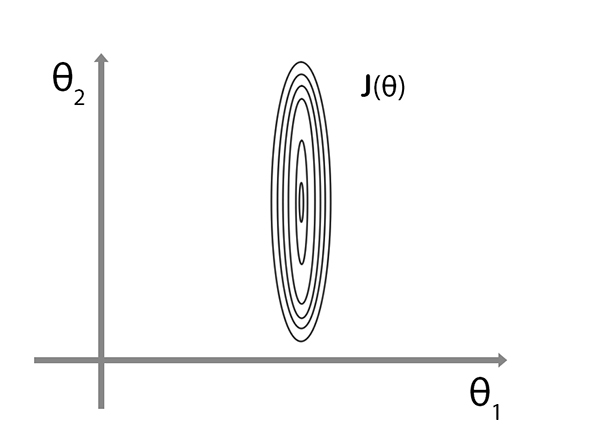




 
 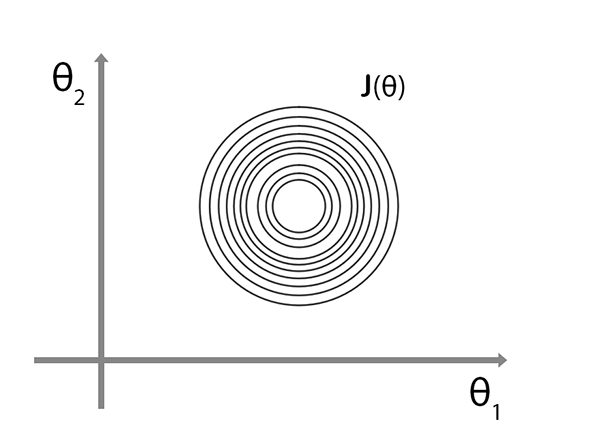

Kai taikome gradiento nusileidimą su tokios formos kainos funkcija, algoritmas gali užtrukti gana ilgai kol konverguos. Svyruos pirmyn ir atgal vingiuotu keliu, kol ras kelią į globalų minimumą.
Šioje  situacijoje kad to išvengti, turėtume suvienodinti savybių mastelį:

 * x(1) = size sqr.m / 250
 * x(2) = no. rooms / 5
 
Tada kainos funkcijos J(θ) kontūrai bus daug mažiau iškreipti ir kontūrai bus panašesni į apskritimą. Gradiento nusileidimo algoritmas tuomet veiks optimaliau, daug tiesesniu keliu link globalaus minimumo <code>**(TODO: aprašyk matematinį įrodymą)**</code>

<code>**Reikia įtraukti kiekvieną savybę į maždaug tą patį diapazoną, kad būtų optimalus GD algoritmo našumas:**</code>

$$ -1 \leq x_{i} \leq 1 $$

Puiku jei pavyksta prieiti pakankamai arti tokio  mastelio, bet tai pat geras diapazonas yra:
<code>**-3 to 3**</code>:

$$ 0 \leq x_{1} \leq 3 $$

$$ -2 \leq x_{2} \leq 0.5 $$

$$ -\dfrac{1}{3} \leq x_{3}  \leq \dfrac{1}{3} $$

<code>**Šitie yra negerai:**</code>

$$ -0.001 \leq x_{4} \leq 0.001 $$

$$ -100 \leq x_{5} \leq 100 $$

## Vidurkio normalizavimas (mean normalization)

<code>**Pakeiskite x(i) į x(i) - u(1)**</code> kad savybės turėtų maždaug nulinį vidurkį.<br><code>**(Išimtinai netaikoma x(0) = 1).**</code>

E.g:
 * x(1) = size sqr.m - 100 / 190
 * x(2) = no. rooms - 2 / 6
 
 $$ -0.5 \leq x_{1} \leq 0.5,  -0.5 \leq x_{2} \leq 0.5 $$
 
 -----------------------------------------------------------
 $$ x_{i} \leftarrow \dfrac{x_{i}- \mu_{i}}{s_{i}}$$
 
* u(i) yra vidutinė vertė duomenų rinkinyje
* s(i) yra diapazonas (maks. min.) arba tai gali būti standartinis nuokrypis

<code>**Savybių mastelio keitimas nebūtinai turi būti tikslus, tiesiog siekite pakankamai gero diapozono.**</code>

## Mokymosi žignis (Learning rate)

### Planas

\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\vec{\theta})
\end{multline*}

Kaip derinti ir įsitikinti, kad gradiento nusileidimas veikia tinkamai? Kaip teisingai pasirinkti mokymosi greitį α (alfa). ?
Taigi gradiento nusileidimo užduotis yra rasti optimalias theta vertes, kurios sumažintų kainos funkciją. Pirmas dalykas visada reikės stebėti J(θ) kainos reikšmės per iteracijas (epochs) grafiką.



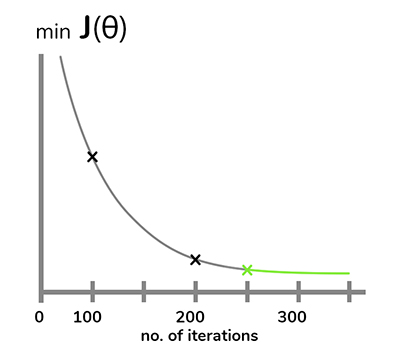

Šioje diagramoje rodoma J(θ) reikšmė po kiekvienos iteracijos. Jei GD veikia tinkamai, ši vertė turėtų mažėti po kiekvienos iteracijos.
Ir kai GD priartėja minimumą, kainos reikšmės mažėjimas sustoja arba mažėja nebereikšmingais dydžiais. 

Tikrose situacijose kartais GD gali prireikti daug iteracijų, kad konverguotu. Ir tai gali 300 ar 3000000 iteracijų.


It's very practical to have <code>**automatic convergance test**</code> that declares convergance if J(θ) decreases by less than some small value like <code>**10 to the power of -2**</code> in one iteration. But its hard to define this threshold correctly

Labai praktiška naudoti <code>**automatinį konvergancijos testą**</code>, kuris identifikuoja konverganciją, jei J(θ) sumažėja mažiau nei kokia nors maža reikšme, pvz., <code>**10^ -2**<. </code> vienoje iteracijoje.
<br>
    
<code>**Isiminti:**</code>
    
 * Jei alfa yra pakankamai mažas, J(θ) turėtų mažėti kiekvienoje iteracijoje;
 * Bet jei alfa yra per mažas, gradiento nusileidimas gali būti labai lėtas;
 * Jei alfa žingsnis per didelis J(θ) gali nemažėti kiekvienos iteracijos metu, gali net niekada nekonverguoti.
 

<div class="alert alert-block alert-success">
<h2>Namų darbai</h2>
    Mūsų duomenų rinkinyje, kas yra:


<code>**Pasirinkite alfa kandidatus: 0.001–0.003, 0.01–0.03, 0.1–0.3, 1 ir nubrėžkite J(θ) su visais mokymosi žignsio nustatymais**</code>
 
Norėdami tai padaryti, galite sukurti nedidelį scenarijų su viskuo ko išmokome. Nesijaudinkite, jei jums sunku, prireiks laiko, kol sujungsite visas dalis. Skaitykite, neskubėkite, atlikite popierinius skaičiavimus ir nesijaudinkite.<br>

### Svarbiausios sąvokos apibūdinamos::

<code>**Hipoteze:**</code>
\begin{multline*}
h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} +  ... +  \theta_{n}x_{n} = \theta^\top x 
\end{multline*}

<code>**Tisklas**</code>:
\begin{multline*}
\min(\theta_{0}, \theta_{1}, ..., \theta_{n})
\end{multline*}

<code>**Kainos funkcija**</code>:
\begin{multline*}
J(\vec{\theta}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2
\end{multline*}

<code>**Vidurkio normalizavimas (mean normalization)**</code>

\begin{multline*} 
x_{i} \leftarrow \dfrac{x_{i}- \mu_{i}}{s_{i}}
\end{multline*}

<code>**Gradientinis nusileidimas:**</code>

\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\vec{\theta})
\end{multline*}

-----------------------------------------------------------------------------------------
\begin{multline*}
\theta_{j} = \theta_{j} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{j}
\end{multline*}

</div>

<code>**Prisiminti: Notacijos:**</code>
 * <code>**m**</code> = mokymo pavyzdžių skaičius (savybių matricos eilučių skaičius)
 * <code>**n**</code> = savybių skaičius (savybių matricos stulpelių skaičius)
 * <code>**x’s**</code> = įvesties kintamieji / nepriklausomi kintamieji / <code>**savybės**</code>
 * <code>**y’s**</code> = išvesties kintamieji / priklausomo kintamieji / <code>**etiketės/vertės**</code>
 * <code>**x(i)**</code> = įvesties kitamasis <code>**(savybė)**</code> iš i'th duomenų rinkinio pavyzdžio;
 * <code>**x(i)(j)**</code> = j savybės konkreti reikšmė  iš i'th uomenų rinkinio pavyzdžio.

<div class="alert alert-block alert-info">
<h2>Vektorizacija</h2>
    
Tai algoritmo konvertavimo procesas iš veikimo su viena verte vienu metu į veikimą su visų verčių rinkiniu vienu metu .
<br>
<code>**Kaino funkcija:**</code>

\begin{multline*}
J(\Theta) = \dfrac{1}{2m}(X\Theta - \vec{y})^{\top}(X\Theta - \vec{y})
\end{multline*}
<br>
<code>**Gradientins nusileidimas:**</code>

\begin{multline*}
\Theta:= \Theta - \dfrac{\alpha}{m} X^{\top}(X\Theta - \vec{y})
\end{multline*}
</div>

<code>**Our hypothesis in this particular case is**</code>

\begin{multline*}
h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}
\end{multline*}

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
full_data = pd.read_csv('../data_samples/real_estate_boston_full.csv')

In [8]:
full_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [10]:
X = full_data[['LSTAT', 'RM']].values
y = full_data['Price'].values

In [23]:
X.shape

(506, 2)

In [24]:
X1 = X[:, 0]
X2 = X[:, 1]

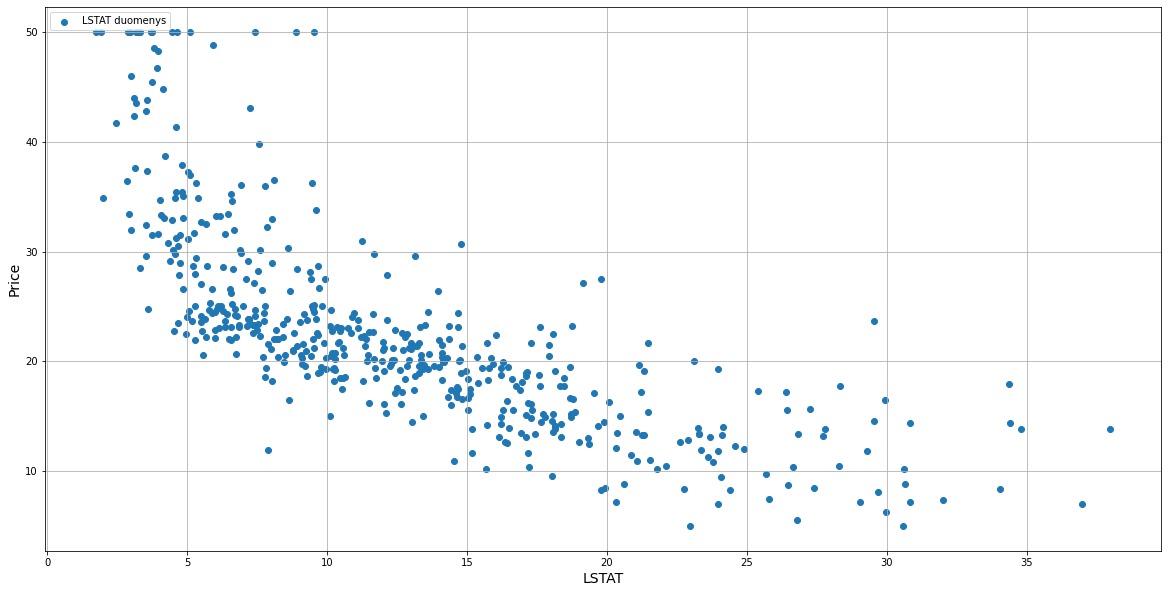

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(X1, y, label='LSTAT duomenys')
plt.xlabel('LSTAT', fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)

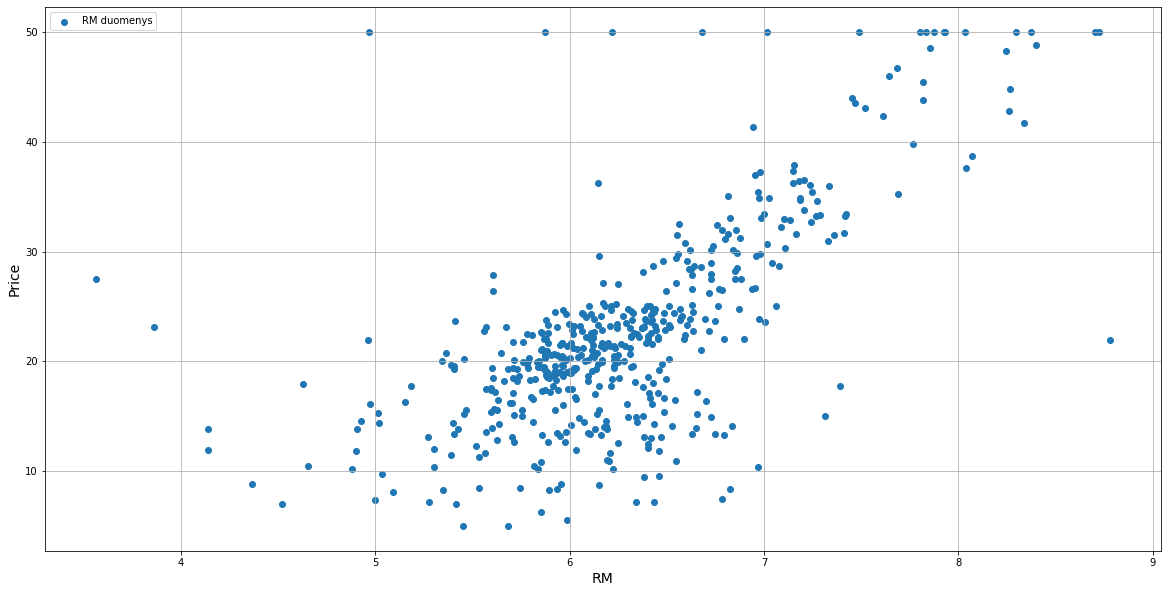

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(X2, y, label='RM duomenys')
plt.xlabel('RM', fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)

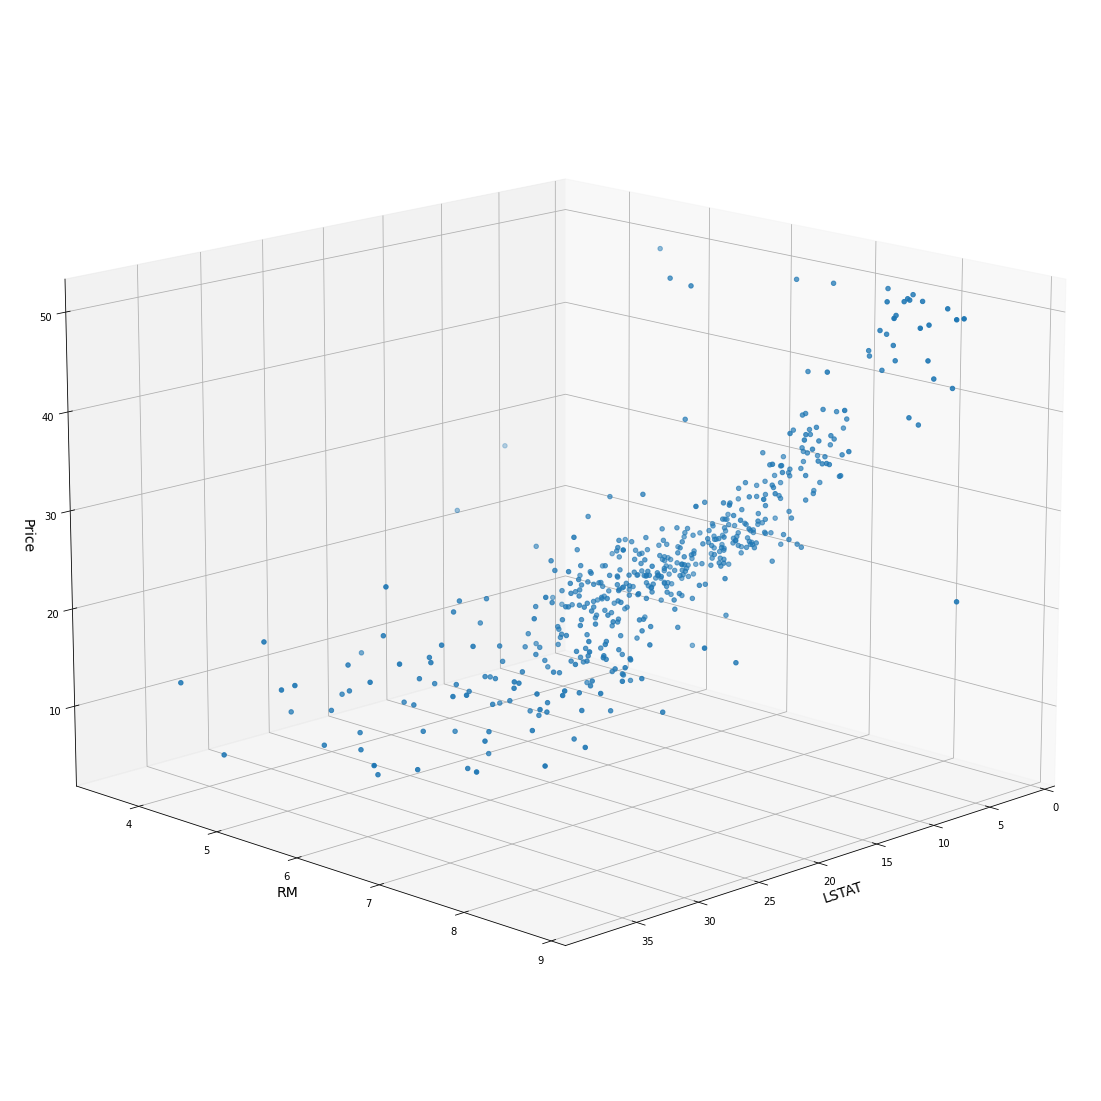

In [31]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.scatter(X1, X2, y)
ax.set_xlabel('LSTAT', fontsize=14)
ax.set_ylabel('RM', fontsize=14)
ax.set_zlabel('Price', fontsize=14)
ax.view_init(15, 45)
ax.grid(True)

In [38]:
x1_mean = X1.mean()
x2_mean = X2.mean()

In [39]:
x1_mean, x2_mean

(12.653063241106722, 6.284634387351779)

In [40]:
x1_std = X1.std()
x2_std = X2.std()

$$ x_{i} \leftarrow \dfrac{x_{i}- \mu_{i}}{s_{i}}$$

In [41]:
X1_norm = (X1 - x1_mean) / x1_std
X2_norm = (X2 - x2_mean) / x2_std

In [46]:
x1_norm_mean = X1_norm.mean()
x2_norm_mean = X2_norm.mean()

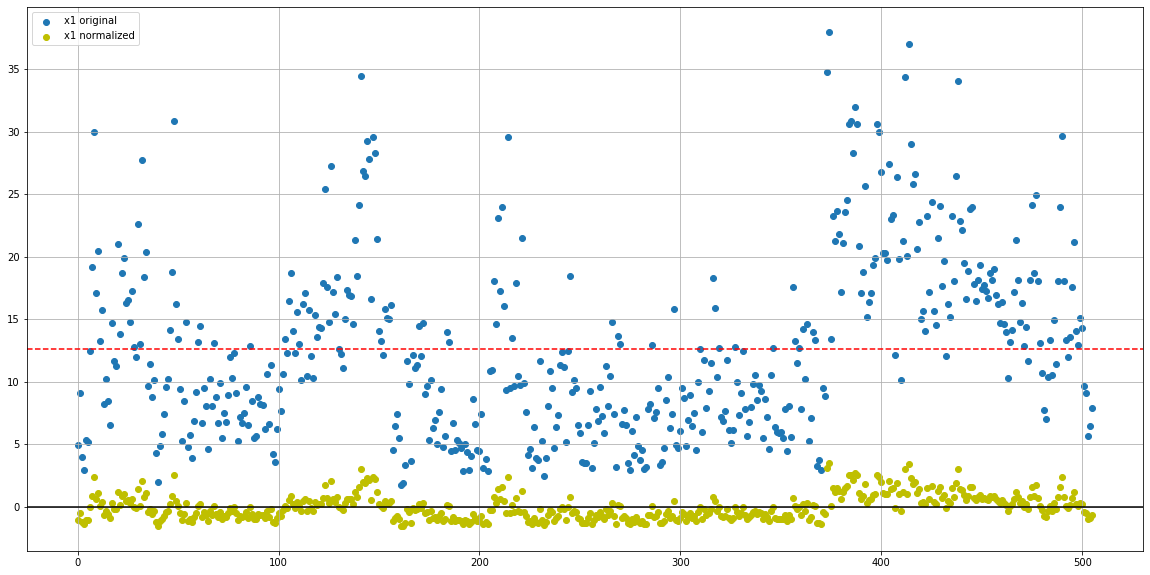

In [48]:
plt.figure(figsize=(20,10))
plt.axhline(x1_mean, c='r', linestyle='--')
plt.axhline(x1_norm_mean, c='black', linestyle='-')
plt.scatter(range(len(X1)), X1, label='x1 original')
plt.scatter(range(len(X1_norm)), X1_norm, c='y', label='x1 normalized')
plt.legend(loc='upper left')
plt.grid(True)

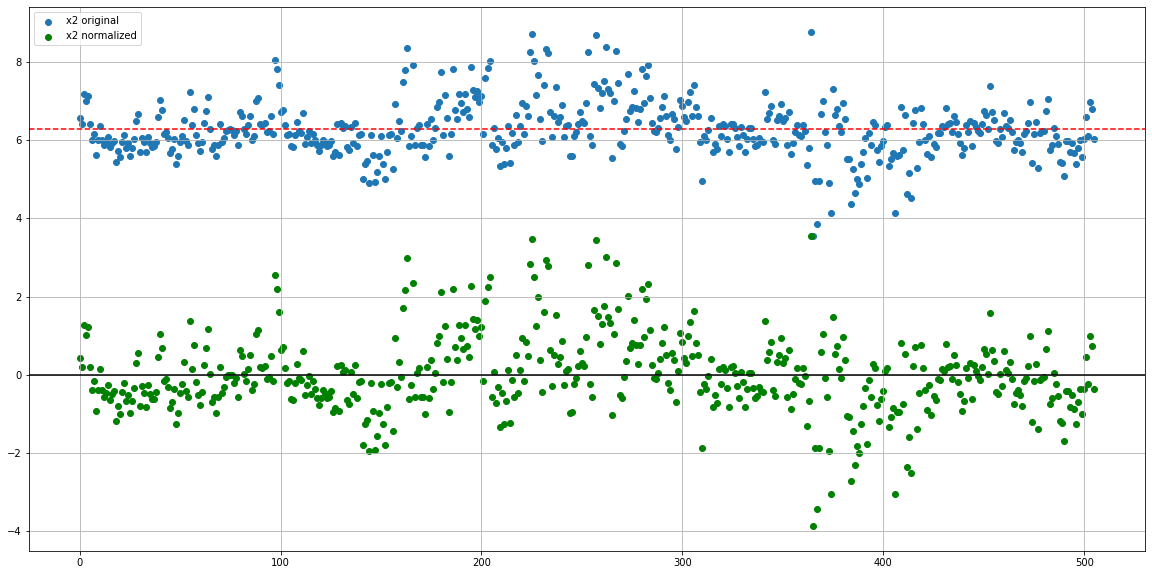

In [537]:
plt.figure(figsize=(20,10))
plt.axhline(x2_mean, c='r', linestyle='--')
plt.axhline(x2_norm_mean, c='black', linestyle='-')
plt.scatter(range(len(X2)), X2, label='x2 original')
plt.scatter(range(len(X2_norm)), X2_norm, c='g', label='x2 normalized')
plt.legend(loc='upper left')
plt.grid(True)

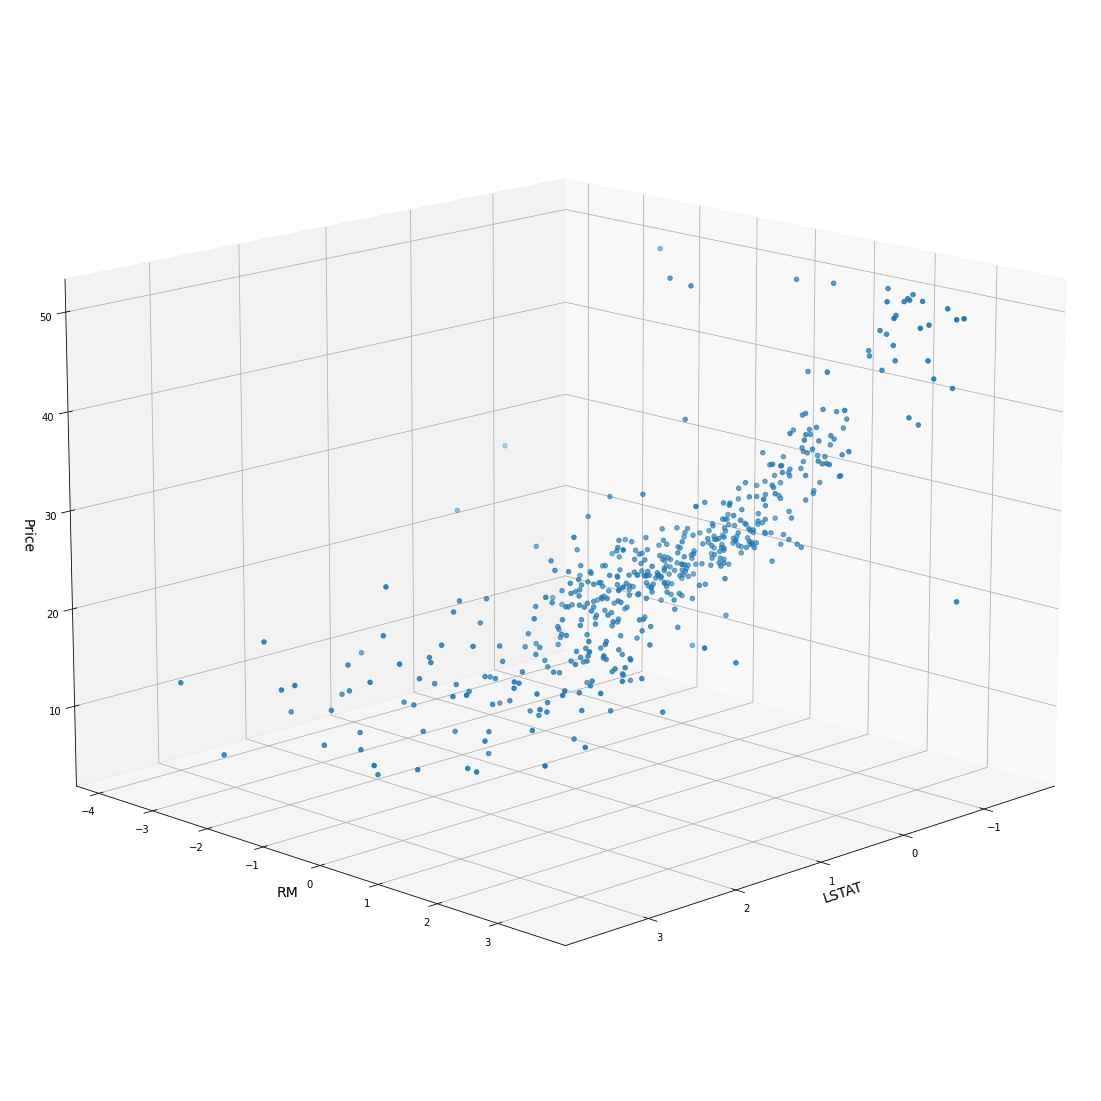

In [50]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.scatter(X1_norm, X2_norm, y)
ax.set_xlabel('LSTAT', fontsize=14)
ax.set_ylabel('RM', fontsize=14)
ax.set_zlabel('Price', fontsize=14)
ax.view_init(15, 45)
ax.grid(True)

Sukuriame matrica X su mūsų duomenų pavyzdžių savybėmis ir tai pat įtraukiam x0 su reikšmėmis 1.

In [51]:
X1_norm.shape

(506,)

In [52]:
X2_norm.shape

(506,)

In [55]:
X = np.array([X1_norm,X2_norm]).T

In [56]:
X.shape

(506, 2)

In [57]:
# axis= 0 yra eilutes
# axis= 1 yra kolonos

X = np.insert(X, 0, 1, axis=1) 

In [58]:
X.shape

(506, 3)

In [61]:
y.shape

(506,)

Metodai `.dot()` ir `.matmul()` daro tą pačia sandaugos operaciją, tačiau nuo python 3.5 matmul funkcija galima iškviesti naudojant specialų operatorių <code>**@**</code>

<code>**Vektrorius:**</code>

\begin{multline*}h_{\theta}(x) = \theta^{\top}x  = \hat{y} \end{multline*}

<code>**Matrica:**</code>

\begin{multline*}h_{\theta}(x) = X \Theta  =\vec{\hat{y}} \end{multline*}


\begin{multline*}
h_{\theta}(x) = X \Theta =
\begin{bmatrix}
x^{(1)}_{0} & x^{(1)}_{1} & \ ... \ & x^{(1)}_{n} \\
x^{(2)}_{0} & x^{(2)}_{1} & \ ... \ & x^{(2)}_{n} \\
.           & .           & \ ... \ & .           \\
x^{(m)}_{0} & x^{(m)}_{1} & \ ... \ & x^{(m)}_{n} \\
\end{bmatrix}
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
.          \\
\theta_{n}
\end{bmatrix}
\end{multline*}

In [80]:
def hypothesis(X, Theta):
    return X @ Theta

\begin{multline*}
J(\Theta) = \dfrac{1}{2m}(X\Theta - \vec{y})^{\top}(X\Theta - \vec{y})
\end{multline*}

In [81]:
def cost(X, y, Theta):
    #m, n = X.shape
    m = y.size
    XO = hypothesis(X, Theta)
    return float( 1./(2*m) * (XO - y).T @ (XO -y) )



Inicijuoti 𝜃 vektorių atsitiktinėmis reikšmėmis <code>**ne nulines reikšmes!**</code>

\begin{multline*}h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}\end{multline*}

In [82]:
m, n = X.shape
thetas = np.random.rand(n)
thetas

array([0.21633565, 0.30068513, 0.95356138])

<div class="alert alert-block alert-info">
<h2>numpy.random.random()</h2>

<code>**Grąžinti atsitiktines trupmenines reikškems pusiau atvirame intervale [0,0, 1,0)**</code>
 
Matematikoje, [tikrasis intervalas](https://en.wikipedia.org/wiki/Interval_(mathematics)) yra realiųjų skaičių rinkinys, kuriame yra visi realieji skaičiai, esantys tarp bet kurių dviejų aibės skaičių.<br>
Pusiau atviras intervalas apima tik vieną iš jo galinių taškų ir žymimas maišant atvirų ir uždarų intervalų žymes. Pavyzdžiui, (0,1] reiškia didesnį nei 0 ir mažesnį arba lygų 1, o [0,1) reiškia didesnį arba lygų 0 ir mažesnį nei 1.
</div>

<code>**Gradientinis nusileidimas**</code>

\begin{multline*}
\Theta:= \Theta - \dfrac{\alpha}{m} X^{\top}(X\Theta - \vec{y})
\end{multline*}

In [83]:
def GD(X, y, Theta, alpha=0.005, epochs=1000):
    m, n = X.shape
    history = np.zeros(epochs)  
        
    for i in range(epochs):
        y_hat      = hypothesis(X, Theta)
        derivative = X.T @ (y_hat - y)
        Theta     -= (alpha / m) * derivative
        history[i] = cost(X, y, Theta)  
     
    return Theta, history

Nustatome alfa - mokymosi žingsnio ir iteracijų (epochų) hyperparametrus

In [84]:
alpha  = 0.005
epochs = 1000

In [85]:
optimal_thetas, cost_history = GD(X, y, thetas, alpha, epochs)

In [ ]:
array([0.21633565, 0.30068513, 0.95356138])

In [86]:
optimal_thetas

array([22.38431323, -4.41784394,  3.73861357])

Palyginimas su sklearn bibliotekos `LinearRegession` 

In [118]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
model = ols.fit(X, y)
r2 = model.score(X, y)
r2

0.6385616062603403

In [609]:
model.intercept_, model.coef_

(22.532806324110677, array([ 0.        , -4.58258541,  3.57614639]))

Palyginimas su `Normal equation`

In [116]:
θ = np.linalg.inv((X.T.dot(X)) ).dot( X.T ).dot(y)
θ

array([22.53280632, -4.58258541,  3.57614639])

In [117]:
optimal_thetas

array([22.38431323, -4.41784394,  3.73861357])

In [94]:
full_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


\begin{multline*}h_{\theta}(x) = 22.38*1 + -4.43*-1.07 + 3.72*0.41\end{multline*}

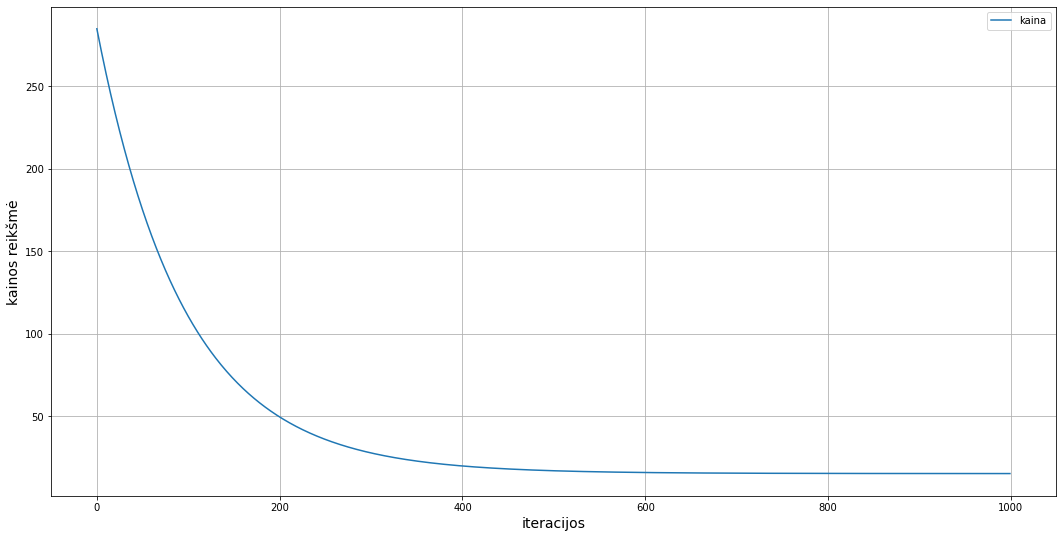

In [95]:
plt.figure(figsize=(18,9))
plt.plot(range(len(cost_history)), cost_history, label='kaina')
plt.xlabel('iteracijos',    fontsize=14)
plt.ylabel('kainos reikšmė',fontsize=14)
plt.legend()
plt.grid(True)

<div class="alert alert-block alert-info">
<h2>Plane function</h2>
    
Mūsų hipotezė atrodo labai panaši į <code>**plokštumos funkciją**</code>, jei mintyse įsivaizduosime, kaip mūsų linijinės regresijos prognozė atrodytų pavaizduota 3D formatu.

\begin{multline*}
a(x-x_{0}) + b(y-y_{0}) + c(z-z_{0}) =  0
\end{multline*}

kuri yra plokštumos normalė. Tai tik tiesinė lygtis:
\begin{multline*}
ax + by + cz + d =  0
\end{multline*}

In [616]:
optimal_thetas

array([22.38919223, -4.43570029,  3.72033772])

In [617]:
optimal_thetas.shape

(3,)

In [96]:
y.max()

50.0

In [99]:
y.min()

5.0

In [97]:
y_hat = hypothesis(X, optimal_thetas)

In [100]:
y_hat.min()

-4.727110061329215

In [98]:
y_hat.max()

40.350715809149285

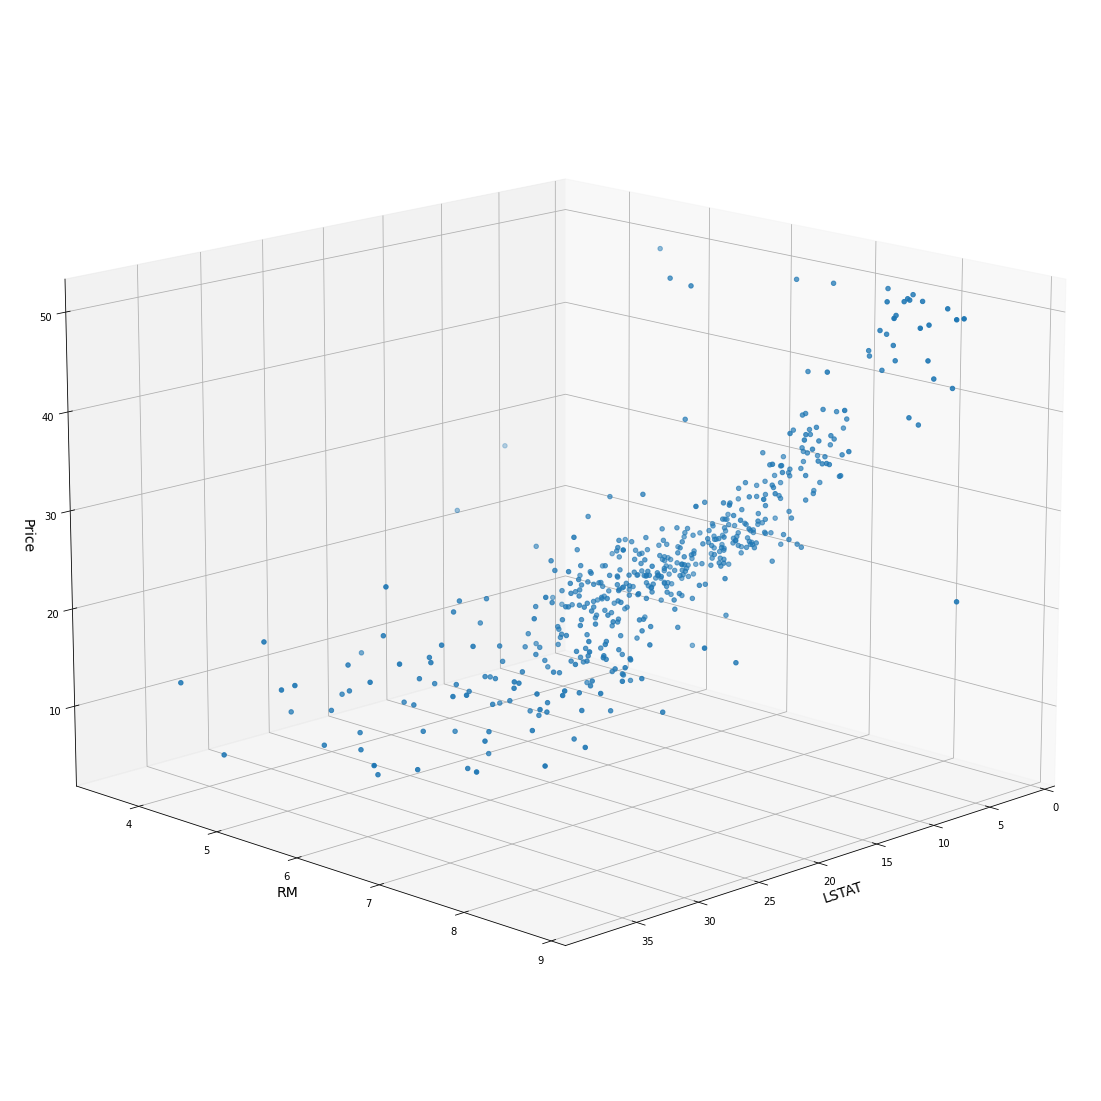

In [101]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.scatter(X1, X2, y)
ax.set_xlabel('LSTAT', fontsize=14)
ax.set_ylabel('RM', fontsize=14)
ax.set_zlabel('Price', fontsize=14)
ax.view_init(15, 45)
ax.grid(True)

In [102]:
xmin, xmax = X[:,1].min(), X[:,1].max()
ymin, ymax = X[:,2].min(), X[:,2].max()
zmin, zmax = y_hat.min() , y_hat.max()

In [103]:
xmin, xmax

(-1.5311271005308116, 3.5487708089144676)

In [104]:
ymin, ymax

(-3.8802493604779404, 3.555044270112717)

In [105]:
zmin, zmax

(-4.727110061329215, 40.350715809149285)

In [106]:
x_plane_points = np.linspace(xmin, xmax, 25)
y_plane_points = np.linspace(ymin, ymax, 25)

In [107]:
xx_plane_points, yy_plane_points = np.meshgrid(x_plane_points, y_plane_points)

In [108]:
X_for_viz = np.array([np.ones(xx_plane_points.size), xx_plane_points.flatten(), yy_plane_points.flatten()]).T

In [109]:
X_for_viz.shape

(625, 3)

In [110]:
zz_plane_points = hypothesis(X_for_viz, optimal_thetas)

In [111]:
xx_plane_points = xx_plane_points.flatten()
yy_plane_points = yy_plane_points.flatten()

In [112]:
zz_plane_points.shape,xx_plane_points.shape, yy_plane_points.shape

((625,), (625,), (625,))

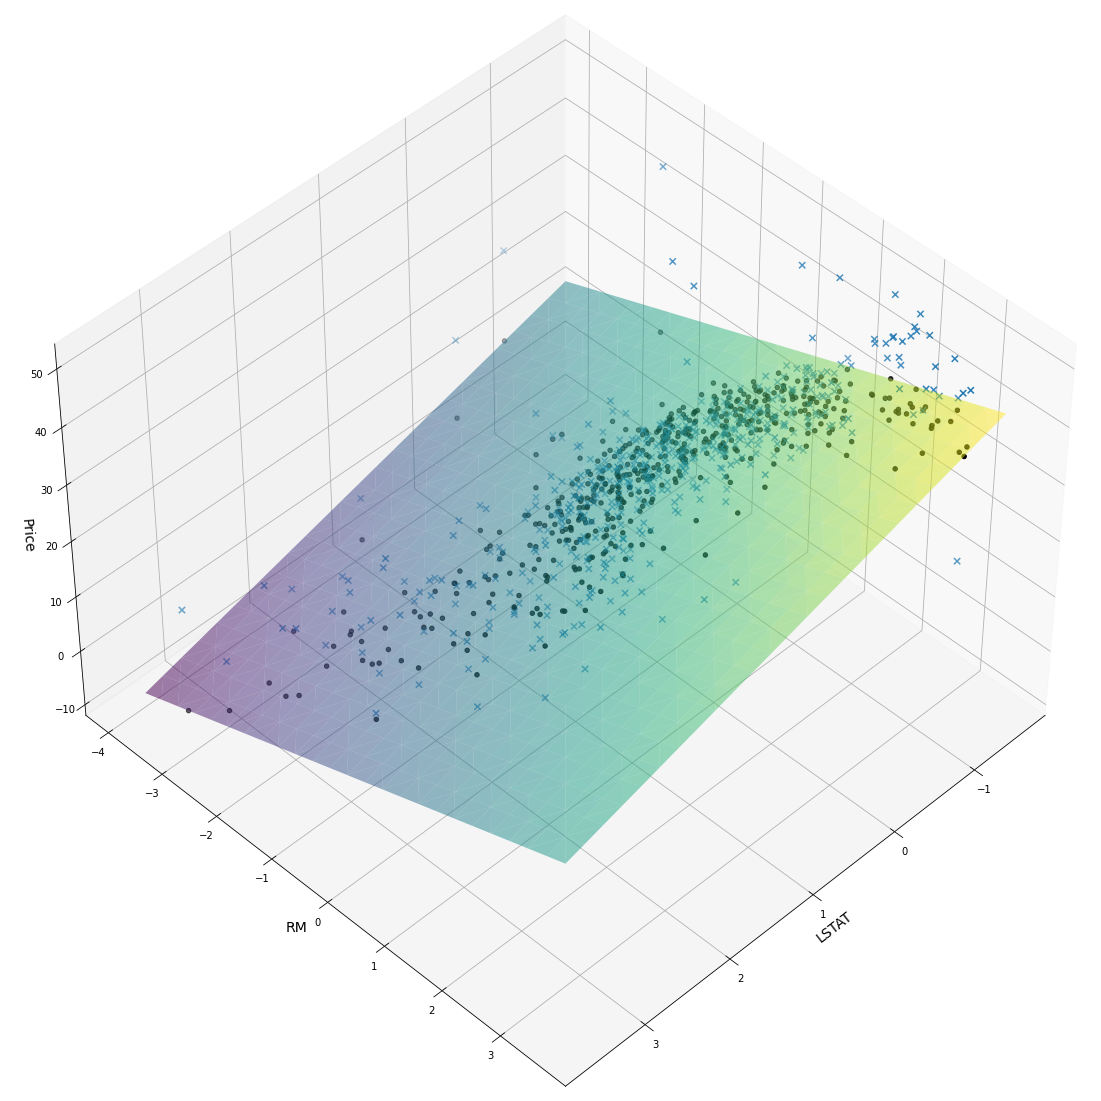

In [115]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.scatter(X1_norm, X2_norm, y, marker='x', s=40, label='Duomenys')
ax.scatter(X1_norm, X2_norm, y_hat, color='black', s=20, label='hipotezė')
ax.plot_trisurf(xx_plane_points, yy_plane_points, zz_plane_points, alpha=0.5, cmap='viridis')
ax.set_xlabel('LSTAT', fontsize=14)
ax.set_ylabel('RM', fontsize=14)
ax.set_zlabel('Price', fontsize=14)
ax.view_init(45, 45)
#ax.view_init(-16.5, 0)
ax.grid(True)
